In [1]:
# %pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import re
from langdetect import detect
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(10,7)})
pd.set_option('max_colwidth', 400)

In [3]:
df = pd.read_json('lyrics.jl', lines=True)

In [4]:
df.sample(3)

,song,lyrics
28328,Kalash-mwaka-moon-lyrics,"\n\n[Intro : Kalash & Pyroman]\nPyroman\nWelcome to Mwaka Moon\n\n[Refrain : Kalash]\nUn peu d'Amsterdam dans la bouche (yaw yaw yaw yaw yaw)\nUne bouffée d'oxygène dans la kush (yaw yaw yaw)\nDans le vide je respire à peine, le succès m'a donné des ailes\nLa même bitch qui me tournait le dos m'a en photo dans l'appareil\nBientôt riche\nQuand Mwaka Moon aura fait mouche\n\n[Couplet 1 : Kalash]..."
36060,Kardinal-offishall-dangerous-lyrics,"\n\n[Hook: Akon]\nGirl, I can't notice but to\nNotice you, noticin' me\nFrom across the room, I can see it\nAnd can't stop myself from lookin'\nAnd noticin' you, noticin' me\nWatch out, I've seen her type before\nThat girl is so dangerous\nThat girl is so dangerous\nThat girl is a bad girl\nI've seen her type before\nShe's so dangerous\nThat girl is so dangerous\nThat girl is a bad girl, yeah\..."
36268,Atmosphere-mama-had-a-baby-and-his-head-popped-off-lyrics,"\n\nTrying to lift her, pull her\n\n[Verse 1: Slug]\nSix, Six, Six in the mornin' and I'm takin' a nap\nIn the back of the car, waitin' for the stars to snap\nThe stars on my cap remind me of the time\nWe went to Fargo, with a car full of anxiety\nAn angel's breast, and a tank top\nShe started at my heart, she's trying to make it stop\nAnd if I haven't learned nothin' then I've learned a lot\n..."


In [5]:
def lang_detector(x):
    '''
        takes a string and returns language of string
    '''
    try:
        return detect(x)
    except:
        return 'unknown language'

def cleaner(df):
    '''
        cleans song column
        extract artist from song column
        cleans lyrics column
        applies lang_detector function 
        creates new column for song length
        removes songs of laguage other than english
        removes outliers calculated using song length
        creates new column of song_length_quantiles for viz
        returns cleand df
    '''
    df['artist'] = df['song'].apply(lambda x: ' '.join(x.split('-')[:2]))
    df['song'] = df['song'].apply(lambda x: x[:-7])    
    df['lyrics'] = df['lyrics'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))
    df['lyrics'] = df['lyrics'].apply(lambda x: re.sub('\n\n', '', x))
    df['lyrics'] = df['lyrics'].apply(lambda x: re.sub('\n', ' ', x))
    df['lang'] = df['lyrics'].apply(lambda x: lang_detector(x))
    df = df[df['lang'] == 'en']
    df['song_length'] = df['lyrics'].apply(lambda x: len(x))
    Q1 = df['song_length'].quantile(0.25)
    Q3 = df['song_length'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df['song_length'] > (Q1 - 1.5 * IQR)) & (df['song_length'] < (Q3 + 1.5 * IQR))]
    df['song_length_quantiles'] = pd.cut(df['song_length'], bins=10, precision=0)    
    return df

df = cleaner(df)

C:\Users\prsin\AppData\Local\Temp\ipykernel_11448\1965627988.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['song_length'] = df['lyrics'].apply(lambda x: len(x))


In [7]:
df = df.reset_index()

In [8]:
df

,index,song,lyrics,artist,lang,song_length,song_length_quantiles
0,0,Kendrick-lamar-swimming-pools-drank,"Pour up , head shot Sit down , stand up Pass out , wake up Faded , faded Now I done grew up 'round some people livin' their life in bottles Granddaddy had the golden flask Backstroke every day in Chicago Some people like the way it feels Some people wanna kill their sorrows Some people wanna fit in with the popular, that was my problem I was in a dark room, loud tunes Lookin' to make a vo...",Kendrick lamar,en,3885,"(3714.0, 4244.0]"
1,1,Kendrick-lamar-money-trees,"Uh, me and my niggas tryna get it, ya bish Hit the house lick: tell me, is you wit' it, ya bish? Home invasion was persuasive From nine to five I know it's vacant, ya bish Dreams of livin' life like rappers do Back when condom wrappers wasn't cool I fucked Sherane and went to tell my bros Then Usher Raymond ""Let It Burn"" came on Hot sauce all in our Top Ramen, ya bish Park the car, t...",Kendrick lamar,en,4922,"(4774.0, 5304.0]"
2,2,Kendrick-lamar-xxx,"America, God bless you if it's good to you America, please take my hand Can you help me underst— New Kung Fu Kenny! Throw a steak off the ark to a pool full of sharks, he'll take it Leave him in the wilderness with a sworn nemesis, he'll make it Take the gratitude from him, I bet he'll show you somethin', whoa I'll chip a nigga lil' bit of nothin', I'll chip a nigga lil' bit of nothin' I'll c...",Kendrick lamar,en,3209,"(3184.0, 3714.0]"
3,3,A-ap-rocky-fuckin-problems,"] I love bad bitches, that's my fuckin' problem And yeah, I like to fuck, I got a fuckin' problem I love bad bitches, that's my fuckin' problem And yeah, I like to fuck, I got a fuckin' problem I love bad bitches, that's my fuckin' problem And yeah, I like to fuck, I got a fuckin' problem If findin' somebody real is your fuckin' problem Bring your girls to the crib, maybe we can solve it, ayy...",A ap,en,3812,"(3714.0, 4244.0]"
4,4,Kendrick-lamar-dna,"I got, I got, I got, I got— Loyalty, got royalty inside my DNA Cocaine quarter piece, got war and peace inside my DNA I got power, poison, pain and joy inside my DNA I got hustle though, ambition flow inside my DNA I was born like this, since one like this, immaculate conception I transform like this, perform like this, was Yeshua new weapon I don't contemplate, I meditate, then off your fuck...",Kendrick lamar,en,3581,"(3184.0, 3714.0]"
...,...,...,...,...,...,...,...
35319,37952,Death-grips-come-up-and-get-me,"My stone wall it's on, dog gaze duct taped to the ceiling Stucco cave make me illi, okay, okay, feel me I'm in an eight high abandoned building No daylight, one midnight lamp lit twenty-four seven Murdered out windows, two exits Street or nosedive to the next life in seconds And suicide ain't my stallion So I'm surrounded Geiger count it, not goin' out, shit's 'bout to get kamikaze Fuck a naz...",Death grips,en,1982,"(1595.0, 2125.0]"
35320,37953,Death-grips-spikes,"Headless I skid like Rita lifted ocean I drift like my planet don’t spin I skid all over marks like I’m haunted Rev it up, twirl my la la like profits It’s never much, I’m war torn in the cockpit Don’t interrupt, my turbulence slaps My path massive demands panoramic Massive Shitty, you’re ten thousand leagues subzero, sweat dripping My hancock do-rag riptides like Tent City Standoff through l...",Death grips,en,2514,"(2125.0, 2654.0]"
35321,37973,Asher-roth-maybe-i-dont-wanna,"I don't want to go to the club, I'd rather sit down on the couch And watch a movie while my girlfriend jerks me off Maybe I want to clown around and turn my music super loud And if I didn’t then I isn’t Asher Roth I like to wake up in the morning with a yawn and a stretch Check my phone and see all the messages I missed ""Asher it's important call me when you get a sec I want to talk about ins...",Asher roth,en,1980,"(1595.0, 2125.0]"
35322,37974,Illenium-and-jon-bellion-good-things-fall-apart,"Did I say something wrong? Did you hear what I was thinking? Did

In [9]:
song_len_df = df['song_length_quantiles'].value_counts(sort=True)
song_len_df = song_len_df.reset_index()
song_len_df = song_len_df.sort_index()

In [14]:
song_len_df

,index,song_length_quantiles,count
0,0,"(2125.0, 2654.0]",6998
1,1,"(1595.0, 2125.0]",6641
2,2,"(2654.0, 3184.0]",5648
3,3,"(1065.0, 1595.0]",5063
4,4,"(3184.0, 3714.0]",3828
5,5,"(535.0, 1065.0]",2632
6,6,"(3714.0, 4244.0]",2107
7,7,"(4244.0, 4774.0]",1071
8,8,"(-0.0, 535.0]",834
9,9,"(4774.0, 5304.0]",502


C:\Users\prsin\AppData\Local\Temp\ipykernel_11448\3587312900.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='index', y='count', data=song_len_df, palette="Blues_d")


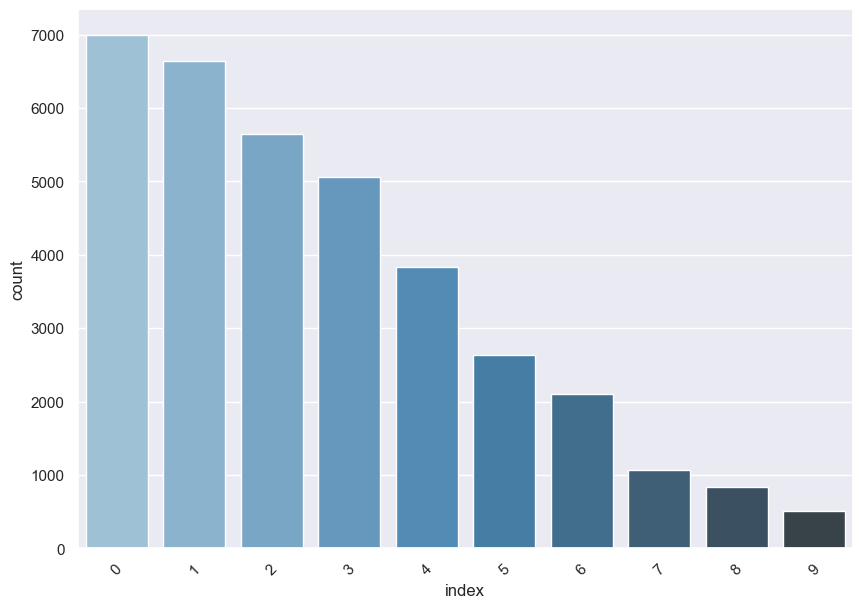

In [15]:
sns.barplot(x='index', y='count', data=song_len_df, palette="Blues_d")
plt.xticks(rotation=45)
plt.show()

In [16]:
df = df.drop_duplicates(subset='artist', keep='first')
df = df.reset_index(level=0)
df['id'] = df['index']
df = df.drop(['index'], axis=1)

In [24]:
df.to_csv('dataframe.csv')